Simple Machine Learning Data Analysis with linear regression and it's variations


SANSKAR SRIVASTAVA

# Happiness Data Analysis
### Data Summary


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("happiness_data.csv")
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [8]:
missing_values  = data.isnull().sum()
missing_values

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22


DATA SUMMARY


1) Happiness dataset size: The given dataset has 1949 rows and 11 columns. The columns represent the features while the rows are the entries.

2) Features: There are two types of features - categorical and numerical(contiuous).

Categorical - [Country name] and [year]

Numerical - [Life ladder], [Log GDP per capita], [Social Support], [Healthy life expectancy at birth], [Freedom to make life choices], [Generosity], [Perceptions of corruption], [Positive affect], [Negative affect]

3) Missing Values: There are 8 features that have varying missing values. These missing values can be dropped or we could use imputer to fill up the missing values.



### Visualization and statistical analysis

In [9]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


The describe() is used to get additional statistical inferences from the dataset.

Count lets us know the amount of data present and possible missing data.

Mean and standard deviation help us realize an average value of the data and how much a value may differ from the mean. A high standard deviation may suggest spread out values or dispersion. Here Health expectancy at birth has a high standard deviation which suggests that this value varies a lot compared to the average - implying the existance of very low and high values compared to the mean.

Min and Max values are useful to understand the range of the values. An unusually large range compared to mean and quartiles imply the possibilities of outliers. (values > 1.5* IQR are considered outliers)




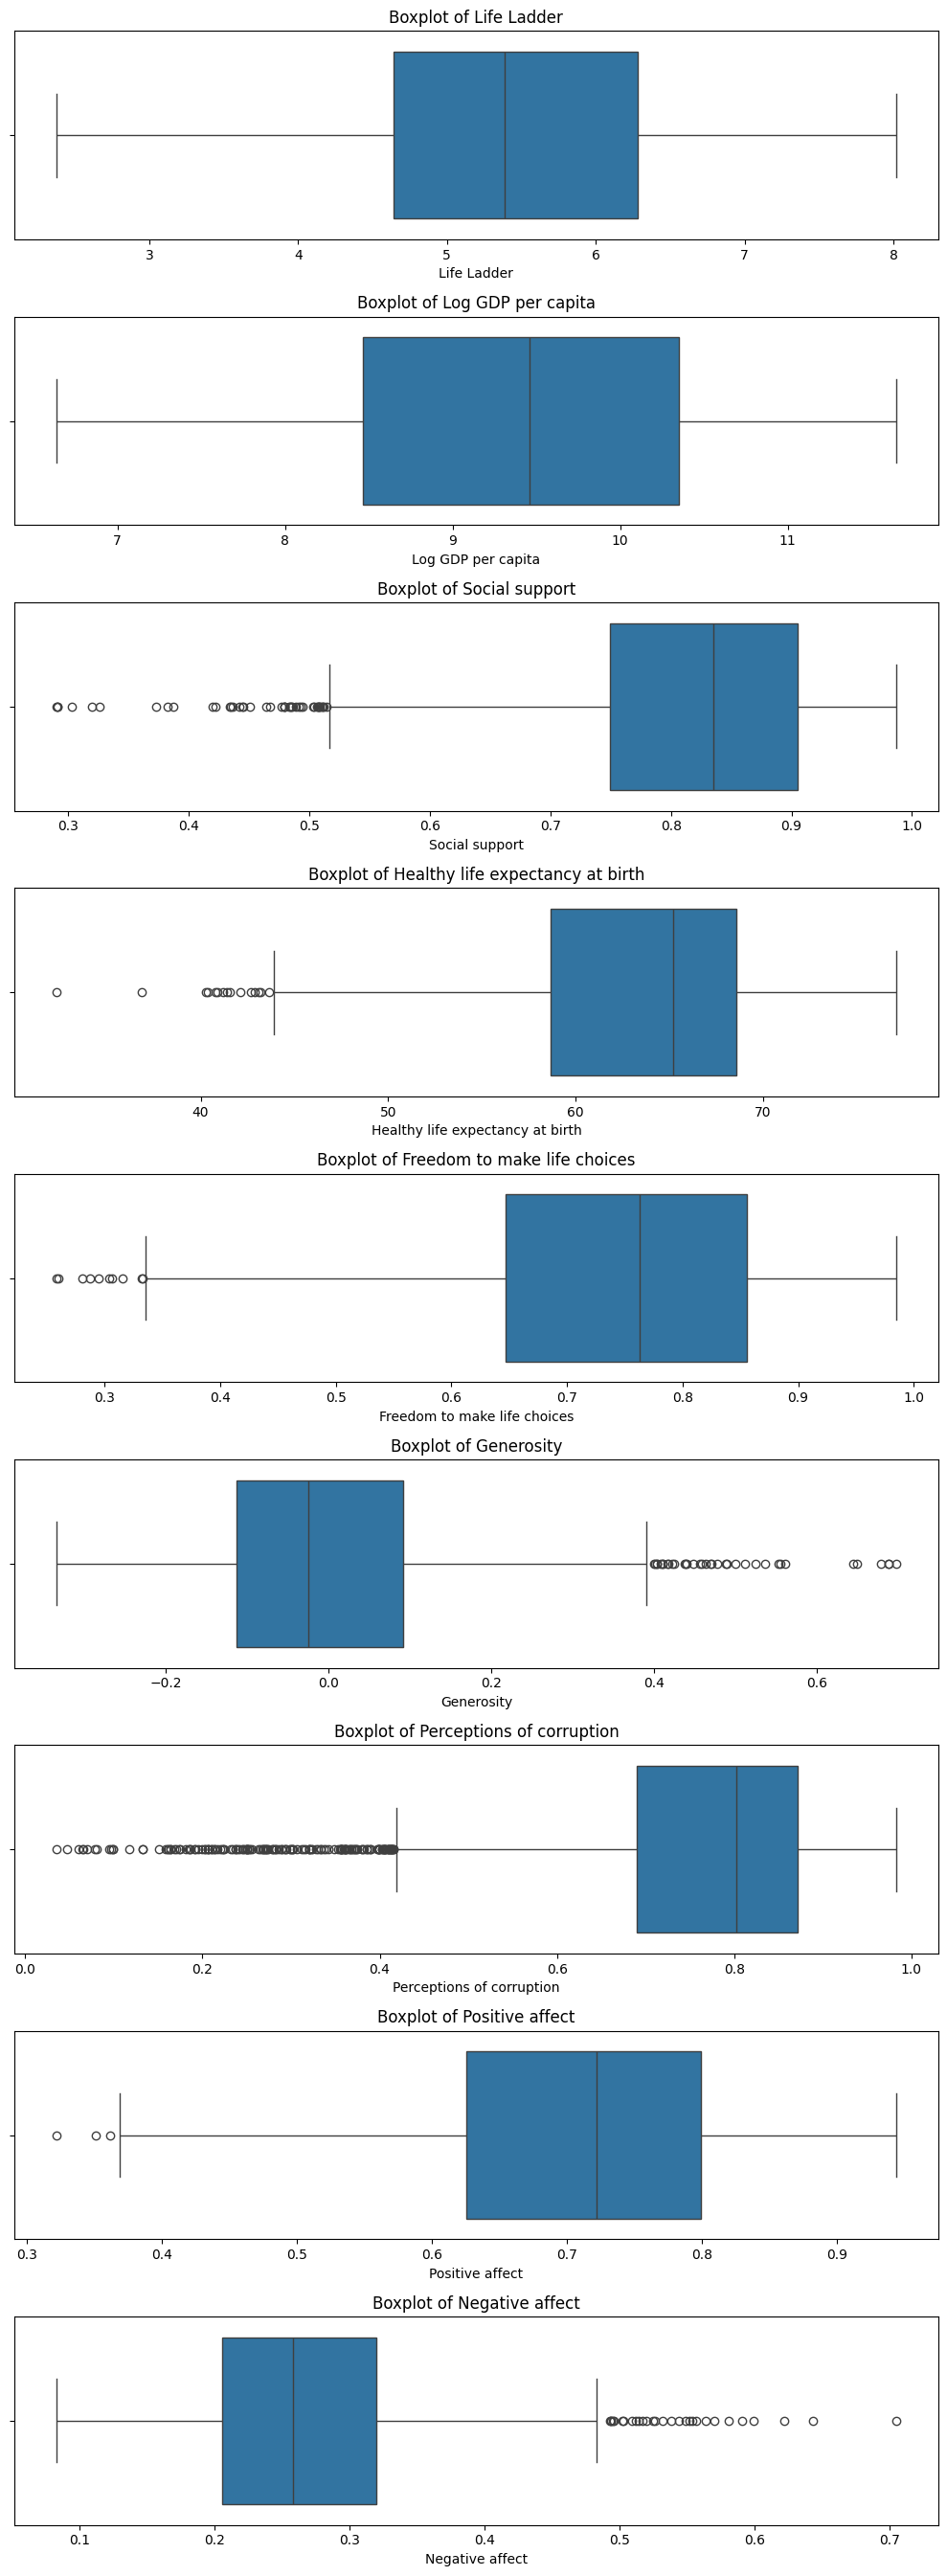

In [10]:
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, len(numerical_cols) * 3))
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

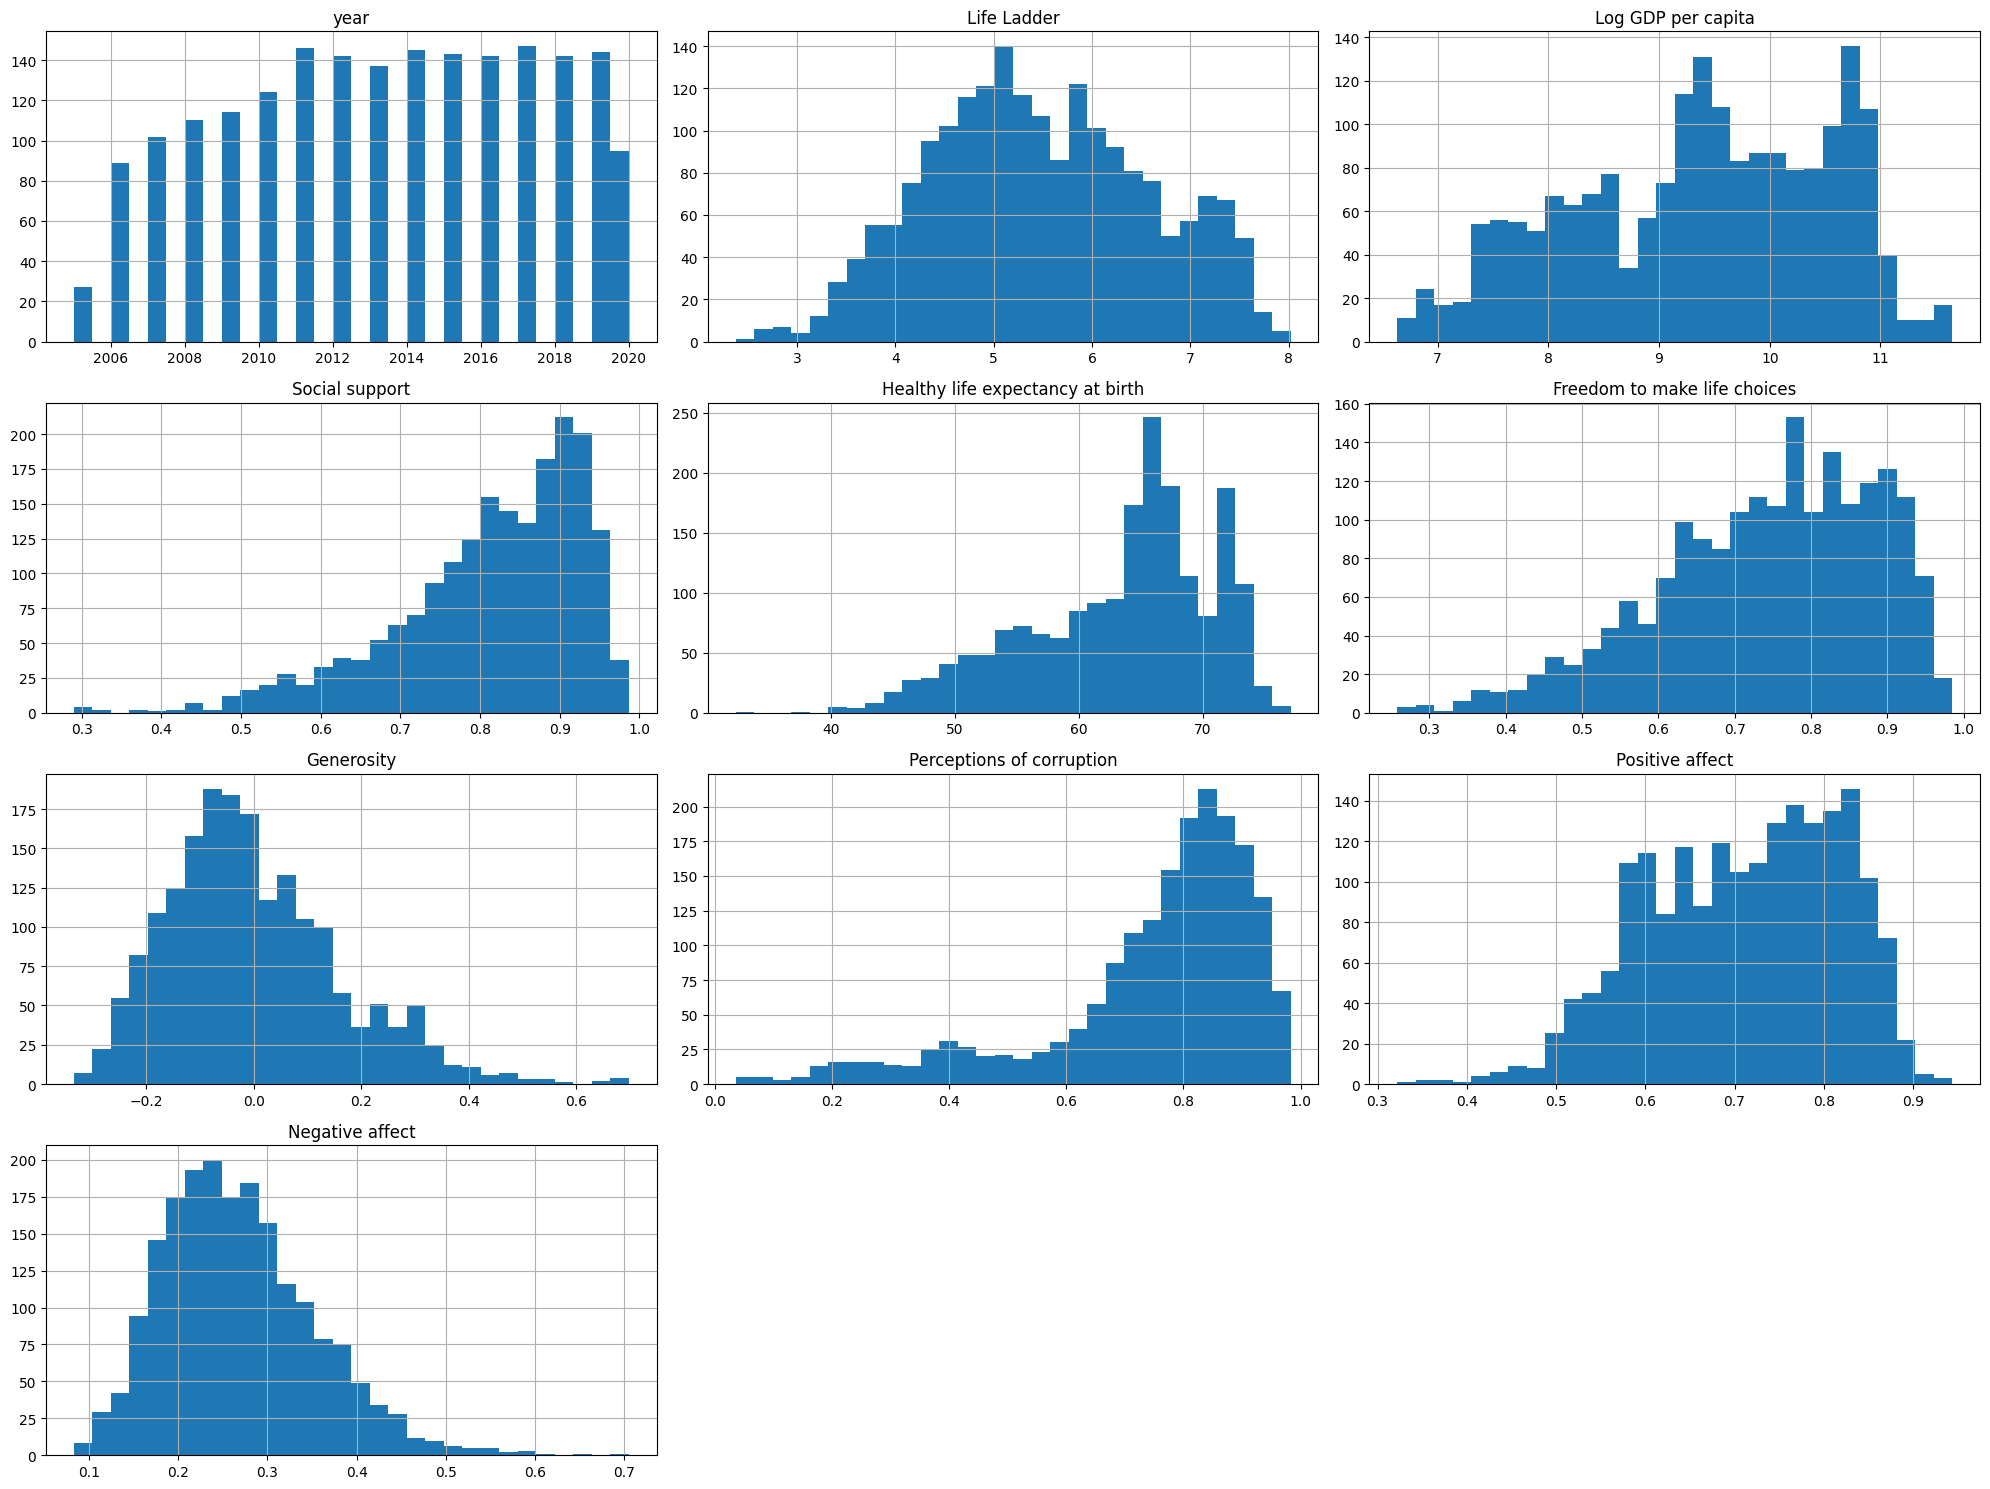

In [11]:
plt.figure(figsize=(12, 8))
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


In [12]:
numerical_data = data.select_dtypes(include=['float64']).columns
skewness = data[numerical_data].skew().sort_values(ascending=False)
skewness

,0
Generosity,0.807140
Negative affect,0.737166
Life Ladder,0.068483
Log GDP per capita,-0.308453
Positive affect,-0.364197
Freedom to make life choices,-0.623019
Healthy life expectancy at birth,-0.744426
Social support,-1.110682
Perceptions of corruption,-1.496045


In [13]:
outlier_counts = {}

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)


outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Number of Outliers'])
print(outlier_counts_df)

                            Feature  Number of Outliers
0                              year                   0
1                       Life Ladder                   0
2                Log GDP per capita                   0
3                    Social support                  43
4  Healthy life expectancy at birth                  15
5      Freedom to make life choices                  10
6                        Generosity                  36
7         Perceptions of corruption                 164
8                   Positive affect                   3
9                   Negative affect                  29


We can infer the results from the boxplots, skewness counts and outlier counts.

Life Ladder:

Skewness: Slightly right-skewed (longer tail on the right).
Outliers: No outliers present.

Log GDP per Capita:

Skewness: Slightly left-skewed (longer tail on the left).
Outliers: No outliers present.

Social Support:

Skewness: Left-skewed (longer tail on the left).
Outliers: Presence of outliers below the minimum.

Healthy Life Expectancy at Birth:

Skewness: Left-skewed (longer tail on the left).
Outliers: Presence of outliers below the minimum.

Freedom to Make Life Choices:

Skewness: Left-skewed (longer tail on the left).
Outliers: Presence of outliers below the minimum.

Generosity:

Skewness: Right-skewed (longer tail on the right).
Outliers: Presence of outliers above the maximum.

Perceptions of Corruption:

Skewness: Left-skewed (longer tail on the left).
Outliers: Many outliers below the minimum.

Positive Affect:

Skewness: Left-skewed (longer tail on the left).
Outliers: A few outliers below the minimum.

Negative Affect:

Skewness: Right-skewed (longer tail on the right).
Outliers: Presence of outliers above the maximum.

While some slight skewness can be tolerated the rest may require special treatment like log transformations(only for positive values so generosity cannot be transformed), Outlier removal, normalization, Boc cox transformation.

### Relationships

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

In [15]:
numeric_data = data.select_dtypes(include=['float64'])
correlation_matrix = numeric_data.corr(method='pearson')
print(correlation_matrix)

                                  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect
Life Ladder                        1.000000         0.790166          0.707806                 0.744506                        0.528063             0.190632          -0.427245              0.532273        -0.297488    
Log GDP per capita                 0.790166         1.000000          0.692602                 0.848049                        0.367932            -0.000915          -0.345511              0.302282        -0.210781    
Social support                     0.707806         0.692602          1.000000                 0.616037                        0.410402             0.067000          -0.219040              0.432152        -0.395865    
Healthy life expectancy at birth   0.744506         0.848049          0.616037                 1.000000                     

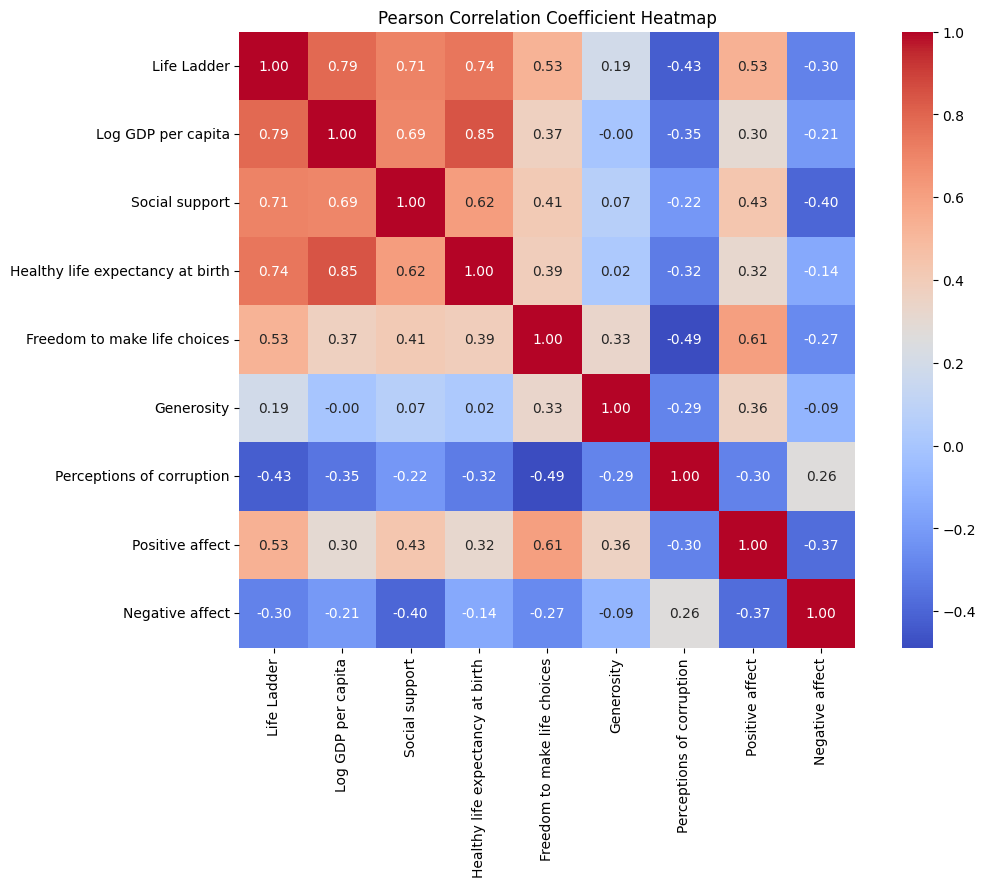

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

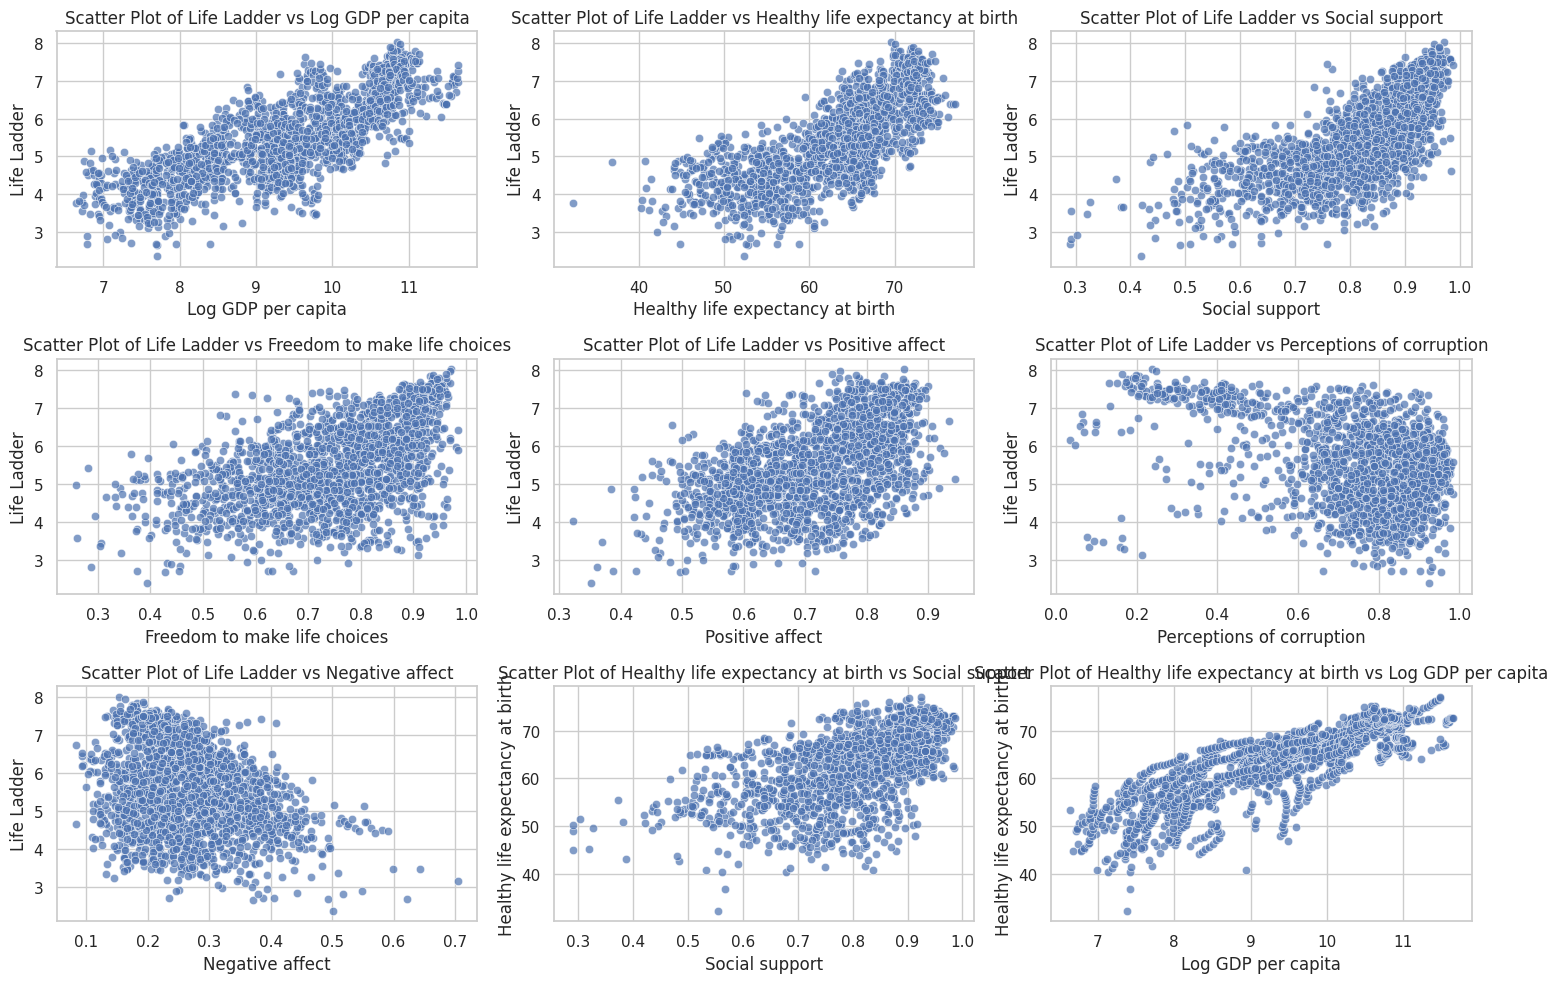

In [17]:
sns.set(style="whitegrid")

scatter_pairs = [
    ('Log GDP per capita', 'Life Ladder'),
    ('Healthy life expectancy at birth', 'Life Ladder'),
    ('Social support', 'Life Ladder'),
    ('Freedom to make life choices', 'Life Ladder'),
    ('Positive affect', 'Life Ladder'),
    ('Perceptions of corruption', 'Life Ladder'),
    ('Negative affect', 'Life Ladder'),
    ('Social support', 'Healthy life expectancy at birth'),
    ('Log GDP per capita', 'Healthy life expectancy at birth'),
]


plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(scatter_pairs):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=data, x=x, y=y, alpha=0.7)
    plt.title(f'Scatter Plot of {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()



Relationships between the data attributes with respect to our target Life Ladder.

This can be inferred using the correlation values and also by analysing scatterplots and the trends that they show.

 1) With Log GDP per Capita:
This feature has the highest correlation(positive) with our target label, this implies with increasing Log GDP per Capita, Life ladder also increases.

2) With Social Support:
This feature shows a high positive correlation with our target and implies that with increasing Social Support, Life ladder also increases

3) With Healthy Life Expectancy at Birth:
This feature shows a high positive correlation with our target and implies that with increasing Social Support, Life ladder also increases

4) With Freedom to Make Life Choices:
This feature shows moderate positive correlation with our target and so with increasing Freedom, Lide ladder does increase but this trend is not as straightforward as with the previous three with much more clustering of values.

5) With Generosity:
This feature shows a slight positive correlation with our target so while both may increase with each other the points are dispersed too much for a clear relationship. Depending on the specific scenario this feature could be dropped later on.

6) With Perceptions of Corruption:
This feature shows a moderate negative correlation with our target and implies that with increasing Corruption, Life ladder decreases.

7) With Positive Affect:
This feature shows a moderate positive correlation with our target and implies that with increasing Positive Affect, Life ladder also increases  but again with much more scattered values.

8) With Negative Affect:
This feature shows a slight negative correlation with our target and implies that with increasing Negative Affect, Life ladder decreases.






### Data Splitting Question

In [18]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(numeric_data)
data = pd.DataFrame(data_imputed, columns=numeric_data.columns)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop(columns=['Life Ladder'])
y = data['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
features = X.columns
train_mean = X_train[features].mean()
train_std = X_train[features].std()
test_mean = X_test[features].mean()
test_std = X_test[features].std()
data_mean = X.mean()
data_std = X.std()
stats_df = pd.DataFrame({
    'Train Mean': train_mean,
    'Train Std': train_std,
    'Test Mean': test_mean,
    'Test Std': test_std,
    'Data Mean': data_mean,
    'Data Std': data_std
})
print(stats_df)

                                  Train Mean  Train Std  Test Mean  Test Std  Data Mean  Data Std
Log GDP per capita                  9.359106  1.156743    9.396434  1.103052   9.368453  1.143370
Social support                      0.812286  0.118556    0.813348  0.116783   0.812552  0.118086
Healthy life expectancy at birth   63.289168  7.428524   63.569561  7.331469  63.359374  7.403463
Freedom to make life choices        0.740476  0.142284    0.748791  0.136712   0.742558  0.140921
Generosity                         -0.000121  0.159614    0.000773  0.155140   0.000103  0.158466
Perceptions of corruption           0.746537  0.183394    0.748887  0.175624   0.747125  0.181438
Positive affect                     0.708042  0.106758    0.715873  0.105589   0.710003  0.106493
Negative affect                     0.267636  0.084181    0.271265  0.086725   0.268544  0.084818


Here first we used an imputer to handle the missing values after which we divided our dataset into 75% train and 25% test data. We did this using scikit learns train_test_split which automatically ensures that data is split in such a way that it is representative of the entire dataset. TO further verify this we calculated the mean and standard deviation of Train,Test data and the entire Data. Looking at the values we can say that the data partioned is representative of the dataset.

### Modelling 

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.model_selection import cross_validate

def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=['neg_mean_squared_error', 'r2'])
    cv_mse = -cv_results['test_neg_mean_squared_error']
    cv_rmse = np.sqrt(cv_mse)
    cv_r2 = cv_results['test_r2']
    print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse}")
    print(f"Cross-Validation Root Mean Squared Error (RMSE): {cv_rmse}")
    print(f"Cross-Validation R^2 Scores: {cv_r2}")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Test Set Mean Squared Error (MSE): {test_mse}")
    print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse}")
    print(f"Test Set R^2 Score: {test_r2}")


part 1 - Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

Cross-Validation Mean Squared Error (MSE): [0.29655581 0.27261531 0.34551723]
Cross-Validation Root Mean Squared Error (RMSE): [0.54456938 0.52212576 0.58780714]
Cross-Validation R^2 Scores: [0.76636471 0.77145467 0.7296435 ]
Test Set Mean Squared Error (MSE): 0.29567708199703674
Test Set Root Mean Squared Error (RMSE): 0.5437619718195056
Test Set R^2 Score: 0.7603357010519696


In [24]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
mse_list = []
rmse_list = []
r2_list = []
for train_index, test_index in kf.split(X):
    X_train_n, X_test_n = X.iloc[train_index], X.iloc[test_index]
    y_train_n, y_test_n = y.iloc[train_index], y.iloc[test_index]
    X_train_normal = np.c_[np.ones(X_train_n.shape[0]), X_train_n]
    X_test_normal = np.c_[np.ones(X_test_n.shape[0]), X_test_n]
    coefficients_normal = np.linalg.inv(X_train_normal.T @ X_train_normal) @ X_train_normal.T @ y_train_n
    y_pred_normal = X_test_normal @ coefficients_normal
    mse_normal = mean_squared_error(y_test_n, y_pred_normal)
    rmse_normal = np.sqrt(mse_normal)
    r2_normal = r2_score(y_test_n, y_pred_normal)
    mse_list.append(mse_normal)
    rmse_list.append(rmse_normal)
    r2_list.append(r2_normal)

print(f'Average Mean Squared Error (Normal Equation): {np.mean(mse_list)}')
print(f'Average Root Mean Squared Error (Normal Equation): {np.mean(rmse_list)}')
print(f'Average R2 (Normal Equation): {np.mean(r2_list)}')

Average Mean Squared Error (Normal Equation): 0.3026988415433371
Average Root Mean Squared Error (Normal Equation): 0.5500190605068466
Average R2 (Normal Equation): 0.7563461726181332


Lasso, Ridge, Elastic Regression

In [25]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.001, max_iter=1000)
evaluate_model(lasso_regression, X_train, y_train, X_test, y_test)


Cross-Validation Mean Squared Error (MSE): [0.29664643 0.27249076 0.34540643]
Cross-Validation Root Mean Squared Error (RMSE): [0.54465258 0.52200647 0.58771288]
Cross-Validation R^2 Scores: [0.76629332 0.77155908 0.7297302 ]
Test Set Mean Squared Error (MSE): 0.29573360353310674
Test Set Root Mean Squared Error (RMSE): 0.5438139420179541
Test Set R^2 Score: 0.7602898869015248


In [26]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.9)
evaluate_model(ridge_regression, X_train, y_train, X_test, y_test)


Cross-Validation Mean Squared Error (MSE): [0.29653877 0.272556   0.34552854]
Cross-Validation Root Mean Squared Error (RMSE): [0.54455374 0.52206896 0.58781675]
Cross-Validation R^2 Scores: [0.76637814 0.77150438 0.72963465]
Test Set Mean Squared Error (MSE): 0.295711945447226
Test Set Root Mean Squared Error (RMSE): 0.5437940285137618
Test Set R^2 Score: 0.7603074421003725


In [30]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
evaluate_model(elastic_net_model, X_train, y_train, X_test, y_test)

Cross-Validation Mean Squared Error (MSE): [0.29659116 0.27251931 0.34546678]
Cross-Validation Root Mean Squared Error (RMSE): [0.54460184 0.52203383 0.58776423]
Cross-Validation R^2 Scores: [0.76633686 0.77153514 0.72968297]
Test Set Mean Squared Error (MSE): 0.29573396227149934
Test Set Root Mean Squared Error (RMSE): 0.5438142718534512
Test Set R^2 Score: 0.7602895961221895


In [29]:
ridge_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"Ridge Regression with alpha={alpha}: MSE={mean_squared_error(y_test, y_pred)}, R^2={r2_score(y_test, y_pred)}")

lasso_alphas = [0.001, 0.01, 0.1, 1]
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print(f"Lasso Regression with alpha={alpha}: MSE={mean_squared_error(y_test, y_pred)}, R^2={r2_score(y_test, y_pred)}")

elastic_params = [(0.001 ,0.5),(0.01, 0.5), (0.1, 0.5), (1.0, 0.5)]
for alpha, l1_ratio in elastic_params:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    print(f"Elastic Net with alpha={alpha}, l1_ratio={l1_ratio}: MSE={mean_squared_error(y_test, y_pred)}, R^2={r2_score(y_test, y_pred)}")

Ridge Regression with alpha=0.01: MSE=0.2956774696105625, R^2=0.7603353868675786
Ridge Regression with alpha=0.1: MSE=0.2956809578869089, R^2=0.7603325594069603
Ridge Regression with alpha=1.0: MSE=0.29571581645757994, R^2=0.7603043044105102
Ridge Regression with alpha=10.0: MSE=0.29606208483309204, R^2=0.760023632784206
Lasso Regression with alpha=0.001: MSE=0.29573360353310674, R^2=0.7602898869015248
Lasso Regression with alpha=0.01: MSE=0.2964744189950463, R^2=0.7596894108107286
Lasso Regression with alpha=0.1: MSE=0.32276603642161716, R^2=0.738378452192664
Lasso Regression with alpha=1: MSE=1.2350510623354092, R^2=-0.001084172707719544
Elastic Net with alpha=0.001, l1_ratio=0.5: MSE=0.29573396227149934, R^2=0.7602895961221895
Elastic Net with alpha=0.01, l1_ratio=0.5: MSE=0.2963127998097236, R^2=0.7598204130124728
Elastic Net with alpha=0.1, l1_ratio=0.5: MSE=0.3083884086917973, R^2=0.7500323959042622
Elastic Net with alpha=1.0, l1_ratio=0.5: MSE=0.7756513710548643, R^2=0.371287281

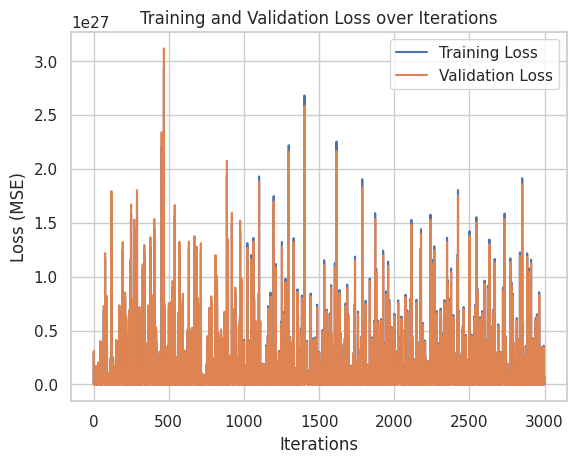

In [95]:
sgd_model = SGDRegressor(max_iter=2000, learning_rate='adaptive', eta0=0.005, alpha=0.01)
train_losses, test_losses = [], []
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    for _ in range(1000):

        sgd_model.fit(X_train_fold, y_train_fold)
        y_train_pred = sgd_model.predict(X_train_fold)
        train_loss = mean_squared_error(y_train_fold, y_train_pred)
        y_test_pred = sgd_model.predict(X_test_fold)
        test_loss = mean_squared_error(y_test_fold, y_test_pred)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss over Iterations')
plt.show()


In [41]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=2000, learning_rate='adaptive', eta0=0.005, alpha=0.0001)
evaluate_model(sgd_regressor, X_train, y_train, X_test, y_test)


Cross-Validation Mean Squared Error (MSE): [0.29682427 0.27248056 0.34569443]
Cross-Validation Root Mean Squared Error (RMSE): [0.54481581 0.52199671 0.58795785]
Cross-Validation R^2 Scores: [0.76615321 0.77156763 0.72950485]
Test Set Mean Squared Error (MSE): 0.29553199336316255
Test Set Root Mean Squared Error (RMSE): 0.5436285435507986
Test Set R^2 Score: 0.7604533042340895


part 3

In this section we used different models - linear, lasso, ridge, elastic and SGD.

Linear regression is a simple model that assumes a linear relationship between the input features (independent variables) and the target variable (dependent variable). It tries to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the predicted and actual values.

Ridge regression is a type of linear regression that adds L2 regularization to penalize large coefficients. This helps prevent overfitting by shrinking the coefficients and making the model more robust, especially when dealing with multicollinearity or noisy data. Alpha controls the strength of the regularization. A larger alpha increases the penalty on large coefficients.

Lasso regression adds L1 regularization to the linear regression, which can shrink some coefficients to zero, effectively performing feature selection. It is useful when you suspect that some features are irrelevant or redundant. Alpha controls the regularization strength, with a higher alpha shrinking more coefficients.

Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization, making it a more flexible model that can shrink coefficients while also performing feature selection. It balances between Ridge and Lasso using the l1_ratio parameter. Alpha controls the overall regularization strength, and l1_ratio controls the balance between L1 and L2 regularization.

SGD is an optimization algorithm used to minimize the loss function by updating the model’s coefficients iteratively. Instead of using the entire dataset to compute the gradients (as in standard gradient descent), SGD uses a subset (or even a single example) to update the coefficients, making it more efficient for large datasets. Learning_rate controls how much the model adjusts the coefficients at each step, and max_iter defines the number of iterations.

Stability:

Linear Regression : The results are stable across cross-validation folds, with similar MSE, RMSE, and R2 scores between cross-validation and test sets. However, the error metrics are slightly higher compared to Ridge, Lasso, and Elastic Net.

Lasso, Ridge, and Elastic Net: These models introduce regularization, which stabilizes them against overfitting and noisy data. They all show similar performance and more stability across different folds and the test set. Elastic Net combines both Ridge and Lasso's strengths, giving similar results to both.

SGD: Though the performance metrics are comparable, SGD's sensitivity to learning rate, batch size, and convergence can lead to less stable behavior. Its cross-validation errors are slightly higher.

Linear Regression: Slightly higher RMSE compared to Ridge, Lasso, and Elastic Net.

Lasso, Ridge, and Elastic Net: All models have almost identical RMSE values but with Ridge being slightly better than the rest

SGD: RMSE is again similar to the rest, but its slightly higher value compared to Lasso, Ridge, and Elastic Net.

Experimenting and analysis using Different parameters and tuning

Ridge Regression:

Alpha Values:
At lower values of alpha (0.01 to 0.1), the MSE and R2 scores are almost identical, indicating that regularization has a minimal impact on the model's performance when alpha is small.
As alpha increases (up to 10.0), the MSE gradually increases, and R2 slightly decreases. This shows that as regularization increases, the model becomes more constrained and less flexible, resulting in a slight performance drop. However, even at alpha = 10.0, the performance is still close to the optimal range, showing that Ridge Regression is fairly robust across different regularization strengths.

Lasso Regression:

Alpha Values:
At low alpha (0.001 and 0.01), Lasso performs similarly to Ridge Regression, with comparable MSE and R2 scores.
However, at higher alphas (0.1 and 1.0), Lasso's performance declines significantly. This is because Lasso aggressively drives coefficients to zero when regularization is strong, which can lead to underfitting as seen with alpha = 1.0, where the R2 is negative (indicating a very poor fit).
Lasso is more sensitive to higher values of alpha, leading to worse performance as it tends to remove too many features.

Elastic Net Regression:

Alpha and L1 Ratio:
With a lower alpha (0.001 and 0.01), Elastic Net performs similarly to Ridge and Lasso, indicating that the combination of both L1 and L2 penalties balances well at these levels.
However, as alpha increases (0.1 and 1.0), Elastic Net starts to perform worse, similar to Lasso. The MSE increases and R2 decreases, showing that the model becomes too restricted and underfits the data.


Ridge Regression is the most stable across different alpha values, with only a slight decrease in performance as regularization strength increases.
Lasso Regression performs well at lower alpha values but struggles significantly with higher regularization, leading to underfitting.
Elastic Net offers a middle ground, performing similarly to Ridge and Lasso at lower regularization levels but showing sensitivity to higher regularization.

For SGD we tried the following experiments -

experiments = [
    {'max_iter': 1000, 'learning_rate': 'constant', 'eta0': 0.01, 'alpha': 0.0001},
    {'max_iter': 500, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 0.001},
    {'max_iter': 2000, 'learning_rate': 'adaptive', 'eta0': 0.005, 'alpha': 0.01},
]

Experiment 1: max_iter=1000, learning_rate=constant, eta0=0.01, alpha=0.0001
Mean Squared Error (SGD): 0.3089961104709114

Experiment 2: max_iter=500, learning_rate=optimal, eta0=0.01, alpha=0.001
Mean Squared Error (SGD): 0.3289083264493584

Experiment 3: max_iter=2000, learning_rate=adaptive, eta0=0.005, alpha=0.01
Mean Squared Error (SGD): 0.2951203921796164

After further tuning we selcted -
max_iter=2000, learning_rate='adaptive', eta0=0.005, alpha=0.0001
This gave us the best results for SGD.

Iterations (max_iter): Increasing the number of iterations (2000) helped the model converge better, especially when using a dynamic learning rate.
Learning Rate (eta0 and strategy): Using an adaptive learning rate with a smaller initial step size (eta0=0.005) allowed for smoother convergence, leading to better performance.
Regularization (alpha): Lowering the regularization strength (alpha=0.0001) helped avoid underfitting while maintaining model complexity.

### Polynomial Features


In [42]:
data_p = pd.read_csv('happiness_data.csv')

In [43]:
numeric_data_p = data_p.select_dtypes(include=['float64'])
imputer = SimpleImputer(strategy='mean')
data_imputed_p = imputer.fit_transform(numeric_data_p)
data_p = pd.DataFrame(data_imputed_p, columns=numeric_data_p.columns)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
X_p = data_p.drop(columns=['Life Ladder'])
y_p = data_p['Life Ladder']
outlier_columns = ['Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices',
                   'Perceptions of corruption', 'Positive affect', 'Negative affect']
for outliers in outlier_columns:
  X_p[outliers] = np.log1p(X_p[outliers])
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_p)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y_p, test_size=0.25, random_state=42)


In [45]:
evaluate_model(linear_regression, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Mean Squared Error (MSE): [0.25795091 0.23252342 0.30757471]
Cross-Validation Root Mean Squared Error (RMSE): [0.50788868 0.48220682 0.55459419]
Cross-Validation R^2 Scores: [0.79677878 0.80506545 0.75933234]
Test Set Mean Squared Error (MSE): 0.2557202393473346
Test Set Root Mean Squared Error (RMSE): 0.5056878872855614
Test Set R^2 Score: 0.792723157723074


In [46]:
evaluate_model(lasso_regression, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Mean Squared Error (MSE): [0.28260041 0.25351622 0.31934682]
Cross-Validation Root Mean Squared Error (RMSE): [0.53160174 0.50350394 0.56510779]
Cross-Validation R^2 Scores: [0.77735918 0.78746627 0.75012104]
Test Set Mean Squared Error (MSE): 0.2752465259787151
Test Set Root Mean Squared Error (RMSE): 0.5246394247277982
Test Set R^2 Score: 0.7768959121179682


In [47]:
evaluate_model(ridge_regression, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Mean Squared Error (MSE): [0.27640742 0.24569451 0.30839383]
Cross-Validation Root Mean Squared Error (RMSE): [0.52574464 0.49567581 0.55533218]
Cross-Validation R^2 Scores: [0.7822382  0.79402355 0.75869141]
Test Set Mean Squared Error (MSE): 0.2658404847742687
Test Set Root Mean Squared Error (RMSE): 0.515597211759595
Test Set R^2 Score: 0.7845200818909996


In [48]:
evaluate_model(elastic_net_model, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Mean Squared Error (MSE): [0.2819698  0.25098684 0.31660597]
Cross-Validation Root Mean Squared Error (RMSE): [0.53100829 0.50098586 0.5626775 ]
Cross-Validation R^2 Scores: [0.77785599 0.78958676 0.75226567]
Test Set Mean Squared Error (MSE): 0.2748139009429711
Test Set Root Mean Squared Error (RMSE): 0.5242269555669291
Test Set R^2 Score: 0.7772465810815505


part 2

In [50]:
ridge_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_p, y_train_p)
    y_pred_p = ridge.predict(X_test_p)
    print(f"Ridge Regression with alpha={alpha}: MSE={mean_squared_error(y_test_p, y_pred_p)}, R^2={r2_score(y_test_p, y_pred_p)}")

lasso_alphas = [0.001, 0.01, 0.1, 1]
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_p, y_train_p)
    y_pred_p = lasso.predict(X_test_p)
    print(f"Lasso Regression with alpha={alpha}: MSE={mean_squared_error(y_test_p, y_pred_p)}, R^2={r2_score(y_test_p, y_pred_p)}")

elastic_params = [(0.001,0.5),(0.01, 0.5), (0.1, 0.5), (1.0, 0.5)]
for alpha, l1_ratio in elastic_params:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X_train_p, y_train_p)
    y_pred_p = elastic_net.predict(X_test_p)
    print(f"Elastic Net with alpha={alpha}, l1_ratio={l1_ratio}: MSE={mean_squared_error(y_test_p, y_pred_p)}, R^2={r2_score(y_test_p, y_pred_p)}")

Ridge Regression with alpha=0.01: MSE=0.25318820663435027, R^2=0.7947755245855045
Ridge Regression with alpha=0.1: MSE=0.2558782113290059, R^2=0.7925951118022168
Ridge Regression with alpha=1.0: MSE=0.2665780396662689, R^2=0.7839222486908982
Ridge Regression with alpha=10.0: MSE=0.2795862155148962, R^2=0.7733783292085449
Lasso Regression with alpha=0.001: MSE=0.2752465259787151, R^2=0.7768959121179682
Lasso Regression with alpha=0.01: MSE=0.2838122722625623, R^2=0.769952852601081
Lasso Regression with alpha=0.1: MSE=0.3389017100777022, R^2=0.7252995050902349
Lasso Regression with alpha=1: MSE=0.4449093639923057, R^2=0.6393738395399253
Elastic Net with alpha=0.001, l1_ratio=0.5: MSE=0.2748139009429711, R^2=0.7772465810815505
Elastic Net with alpha=0.01, l1_ratio=0.5: MSE=0.2841199325293227, R^2=0.769703475200407
Elastic Net with alpha=0.1, l1_ratio=0.5: MSE=0.30387879228153014, R^2=0.7536877149035954
Elastic Net with alpha=1.0, l1_ratio=0.5: MSE=0.44081800551832756, R^2=0.64269013498557

In [54]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.transform(X_test)

random_seed = 42
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.001, random_state=random_seed)
scores = cross_val_score(sgd_model, X_train_p, y_train_p, cv=3, scoring='neg_mean_squared_error')
print("SGD Regression with Polynomial Features")
print("Cross-Validation Scores (MSE):", -scores)
print("Average CV MSE:", -np.mean(scores))
sgd_model.fit(X_train_p, y_train_p)
y_pred = sgd_model.predict(X_test_p)
mse_test = mean_squared_error(y_test_p, y_pred)
print(f"Mean Squared Error on Test Set: {mse_test}")



SGD Regression with Polynomial Features
Cross-Validation Scores (MSE): [0.26781234 0.30358941 0.26922022]
Average CV MSE: 0.2802073215720071
Mean Squared Error on Test Set: 0.2578178053456982


In [57]:
train, train_scores, test_scores = learning_curve(sgd_model, X_train_p, y_train_p, cv=3,
                                                       scoring='neg_mean_squared_error', n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

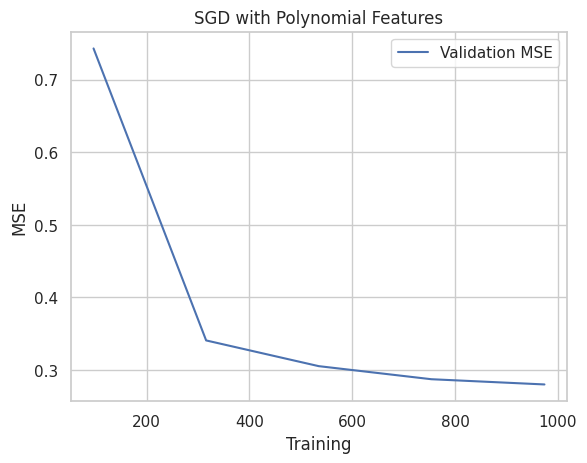

In [55]:
plt.plot(train, test_scores_mean, label="Validation MSE")
plt.xlabel('Training')
plt.ylabel('MSE')
plt.title('SGD with Polynomial Features')
plt.legend()
plt.show()

Linear regression is a simple model that assumes a linear relationship between the input features (independent variables) and the target variable (dependent variable). It tries to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the predicted and actual values.

Ridge regression is a type of linear regression that adds L2 regularization to penalize large coefficients. This helps prevent overfitting by shrinking the coefficients and making the model more robust, especially when dealing with multicollinearity or noisy data. Alpha controls the strength of the regularization. A larger alpha increases the penalty on large coefficients.

Lasso regression adds L1 regularization to the linear regression, which can shrink some coefficients to zero, effectively performing feature selection. It is useful when you suspect that some features are irrelevant or redundant. Alpha controls the regularization strength, with a higher alpha shrinking more coefficients.

Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization, making it a more flexible model that can shrink coefficients while also performing feature selection. It balances between Ridge and Lasso using the l1_ratio parameter. Alpha controls the overall regularization strength, and l1_ratio controls the balance between L1 and L2 regularization.

SGD is an optimization algorithm used to minimize the loss function by updating the model’s coefficients iteratively. Instead of using the entire dataset to compute the gradients (as in standard gradient descent), SGD uses a subset (or even a single example) to update the coefficients, making it more efficient for large datasets. Learning_rate controls how much the model adjusts the coefficients at each step, and max_iter defines the number of iterations.

Linear Regression:

Performance:
Achieved the best performance in terms of test set MSE (0.2557) and R² (0.7927), suggesting that it captures the relationship between features and target variables effectively with polynomial features.
Stability: The cross-validation R² scores are consistently high (around 0.79-0.80), indicating stable performance across folds.

Inference: Linear regression works well with polynomial features, improving both error metrics and overall predictive performance. It balances bias and variance reasonably well.

Lasso Regression:
Performance:
Lasso's test set MSE (0.2752) is worse than Linear Regression's, and the R² score (0.7769) is also lower.
Stability: The cross-validation MSEs show greater variability compared to linear regression, with R² scores ranging from 0.75 to 0.78.

Inference: Lasso tends to penalize and shrink coefficients. This can cause a reduction in performance.

Ridge Regression:
Performance:
Ridge Regression performs slightly worse than Linear Regression but better than lasso, with an MSE of 0.2658 and an R² score of 0.7845.
Stability: Ridge Regression shows stable performance across cross-validation with R² scores (0.76-0.79), providing better generalization than Lasso.
Inference: Ridge handles polynomial features better than Lasso.

Elastic Net:

Performance:
MSE (0.2748) and R² (0.7772) for the test set are similar to Lasso's performance.
Stability: Similar to Ridge and Lasso, with cross-validation scores in a similar range.
Inference: Its slightly worse performance suggests the regularization effect from Lasso is dominant, shrinking too many coefficients for the polynomial features.
Stochastic Gradient Descent (SGD) Regression:
Performance:
Test Set MSE: 0.2578, which is comparable to Linear Regression.
Stability: Cross-validation shows more variability in MSEs.
Inference: SGD doesn't perform as well with polynomial features due to potential issues like sensitivity to learning rates and convergence.

part 3

Further experiments with Ridge, Elastic and Lasso show good results.

Ridge Regression:
Alpha = 0.01:

MSE: 0.2532
R2: 0.7948

Inference: This provides the best performance among the Ridge regression models, showing a very low MSE and high R2.

Alpha = 0.1:

MSE: 0.2559
R2: 0.7926

Inference: Increasing the alpha slightly worsens the performance but remains close to the best model.

Alpha = 1.0:

MSE: 0.2666
R2: 0.7839

Inference: As the regularization increases, the model starts to underperform compared to smaller alpha values, suggesting that the added penalty is causing underfitting. The model becomes more biased.

Alpha = 10.0:

MSE: 0.2796
R2: 0.7734

Inference: At this point, the model is overly constrained, resulting in a noticeable decline in R2 and an increase in MSE, indicating underfitting.

Lasso Regression:
Alpha = 0.001:

MSE: 0.2752
R2: 0.7769

Inference: This value of alpha results in acceptable performance for Lasso, though not as good as Ridge.

Alpha = 0.01:

MSE: 0.2838
R2: 0.7699

Inference: As alpha increases, Lasso begins to penalize coefficients more heavily, resulting in a higher MSE and lower R2.

Alpha = 0.1:

MSE: 0.3389
R2: 0.7253

Inference: With higher regularization, the performance further degrades.

Alpha = 1:

MSE: 0.4449
R2: 0.6394

Inference: At alpha = 1, Lasso performs quite poorly. The model underfits the data substantially.

Elastic Net:
Alpha = 0.001, l1_ratio = 0.5:

MSE: 0.2748
R2: 0.7772

Inference: With a small alpha and a balanced ratio of L1 and L2 penalties, Elastic Net performs comparably to Lasso with alpha = 0.001.

Alpha = 0.01, l1_ratio = 0.5:

MSE: 0.2841
R2: 0.7697

Inference: Increasing alpha causes a decline in performance, similar to Lasso.

Alpha = 0.1, l1_ratio = 0.5:

MSE: 0.3039
R2: 0.7537

Inference: At this alpha, the model starts underfitting.

Alpha = 1.0, l1_ratio = 0.5:

MSE: 0.4408
R2: 0.6427

Inference: With a high alpha, Elastic Net behaves similarly to Lasso with an alpha of 1.

Best Performance: Ridge regression with a small alpha (0.01) shows the best results in terms of MSE and R², indicating that regularization helps improve model stability without overly penalizing the coefficients.

Ridge Resgression- Final

Ridge Regression with alpha=0.01: MSE=0.25318820663435027, R^2=0.7947755245855045


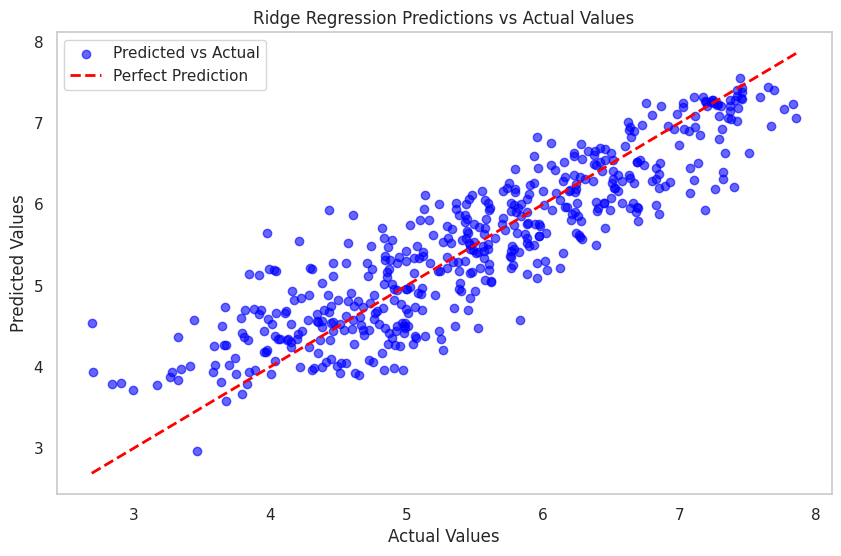

In [58]:
alpha = 0.01
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_p, y_train_p)
y_pred_p = ridge.predict(X_test_p)
mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print(f"Ridge Regression with alpha={alpha}: MSE={mse}, R^2={r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_p, y_pred_p, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions vs Actual Values')
plt.legend()
plt.grid()
plt.show()


For this assignment I have used MSE, RMSE and R2 as evaluation metrics

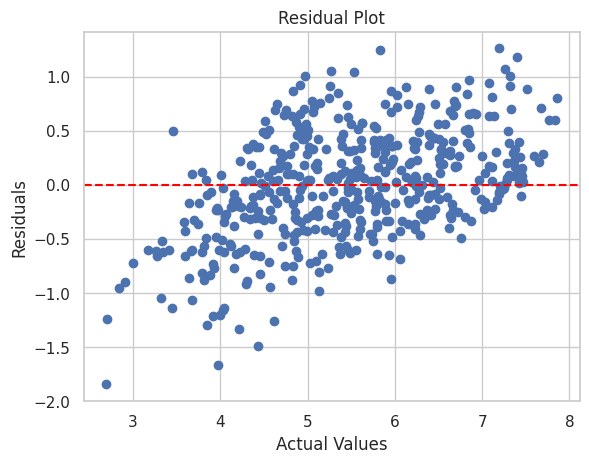

In [59]:
residuals = y_test_p - y_pred_p
plt.scatter(y_test_p, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

While there is no clear pattern in the residuals, most of the values are between [-0.5, 0.5] which  implies that most of the values were predicted accurately. The predictions do suffer for lower and higher ends of the life ladder, where our model has trouble predicting accurately.

Overall our model performs quite well with a MSE of 0.253 and R2 of 0.7947

For future works we can perform hyperparameter tuning properly using GridSearchCV.

We can try to see if increasing the polynomial degree work better. SO far we have tried for degree  = 2, this did increase model performance compared to just linear.

Better models could also do the trick like decision trees, Random Forest etc.